In [10]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import sqlalchemy as sqlalchemy
import nltk
import matplotlib.pyplot as plt
import scipy.stats as sts

In [11]:
rds_connection_string = "postgres:postgres@localhost:5432/finalp_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [12]:
engine.table_names()

['review_info', 'movie_info']

In [13]:
movie_info=pd.read_sql_query('select * from movie_info', con=engine)

In [14]:
duplicates=movie_info[movie_info.duplicated()]
duplicates

,movie_id,movie_title,rating,nreviews,genre,genre1,genre2,genre3
939,tt9140560,WandaVision,8.3,66492.0,Action Comedy Drama,Action,Comedy,Drama
944,tt2560140,Attack on Titan,8.9,203898.0,Animation Action Adventure,Animation,Action,Adventure
951,tt2306299,Vikings,8.5,434958.0,Action Adventure Drama,Action,Adventure,Drama
962,tt7737786,Greenland,6.4,64878.0,Action Drama Thriller,Action,Drama,Thriller
964,tt7221388,Cobra Kai,8.6,110608.0,Action Comedy Drama,Action,Comedy,Drama
...,...,...,...,...,...,...,...,...
3210,tt0475944,The Covenant,5.3,46948.0,Action Adventure Fantasy,Action,Adventure,Fantasy
3216,tt2140553,The Last of Us,9.7,51186.0,Action Adventure Drama,Action,Adventure,Drama
3219,tt0103893,Buffy the Vampire Slayer,5.7,40119.0,Action Comedy Fantasy,Action,Comedy,Fantasy
3221,tt0114508,Species,5.8,74503.0,Action Horror Sci-Fi,Action,Horror,Sci-Fi


In [15]:
movie_info_clean=movie_info.drop_duplicates(subset="movie_id")
movie_info_clean

,movie_id,movie_title,rating,nreviews,genre,genre1,genre2,genre3
0,tt9140560,WandaVision,8.3,66492.0,Action Comedy Drama,Action,Comedy,Drama
1,tt2560140,Attack on Titan,8.9,203898.0,Animation Action Adventure,Animation,Action,Adventure
2,tt6878306,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
3,tt6475714,Monster Hunter,5.3,18284.0,Action Adventure Fantasy,Action,Adventure,Fantasy
4,tt0944947,Game of Thrones,9.3,1776219.0,Action Adventure Drama,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...
3841,tt0087075,The Company of Wolves,6.7,15065.0,Drama Fantasy Horror,Drama,Fantasy,Horror
3842,tt4798836,Bad Hair,5.6,2229.0,Comedy Horror,Comedy,Horror,None
3843,tt0256009,The Devil's Backbone,7.4,61988.0,Drama Horror,Drama,Horror,None
3844,tt0086154,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery


In [16]:
review_info=pd.read_sql_query('select * from review_info', con=engine)

In [20]:
review_info_clean=review_info.drop_duplicates()
review_info_clean

,movie_id,rating_ind,rating_text
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...
1,tt6878306,8.0,Having read the book made the movie easier to ...
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...
3,tt6878306,9.0,I didn't really love this film. I think it is ...
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...
...,...,...,...
17908,tt0086154,8.0,Psycho II does a great job continuing with the...
17909,tt0086154,8.0,Everyone knows the original 'Psycho' film and ...
17910,tt9742392,3.0,"This movie just becomes one more recent film ,..."
17911,tt9742392,2.0,The success of a slow-moving thriller depends ...


CREATING A BINARY VARIABLE FOR SENTIMENT ANALYSIS 

In [23]:
pos_neg_ind=np.where(review_info_clean["rating_ind"]<8,0,1)
review_info_clean["pos_neg_ind"]=pos_neg_ind.tolist()

C:\Users\arpib\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
review_info_clean

,movie_id,rating_ind,rating_text,pos_neg_ind
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...,1
1,tt6878306,8.0,Having read the book made the movie easier to ...,1
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...,1
3,tt6878306,9.0,I didn't really love this film. I think it is ...,1
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...,0
...,...,...,...,...
17908,tt0086154,8.0,Psycho II does a great job continuing with the...,1
17909,tt0086154,8.0,Everyone knows the original 'Psycho' film and ...,1
17910,tt9742392,3.0,"This movie just becomes one more recent film ,...",0
17911,tt9742392,2.0,The success of a slow-moving thriller depends ...,0


EXPLORING DATA AND FURTHER CLEANUP

In [25]:
combined_df=review_info_clean.merge(movie_info_clean, how="left",on="movie_id")

In [26]:
combined_df.describe()
movie_df=combined_df.drop_duplicates()
movie_df

,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
1,tt6878306,8.0,Having read the book made the movie easier to ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
3,tt6878306,9.0,I didn't really love this film. I think it is ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...,0,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...
15074,tt0086154,8.0,Psycho II does a great job continuing with the...,1,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery
15075,tt0086154,8.0,Everyone knows the original 'Psycho' film and ...,1,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery
15076,tt9742392,3.0,"This movie just becomes one more recent film ,...",0,Kindred,4.8,561.0,Drama Horror Mystery,Drama,Horror,Mystery
15077,tt9742392,2.0,The success of a slow-moving thriller depends ...,0,Kindred,4.8,561.0,Drama Horror Mystery,Drama,Horror,Mystery


In [27]:
#any movie in the dataset that has a tag of being horror**Drama and so on

horror_df=movie_df[movie_df['genre'].str.contains("Horror")]
horror_df.head()

drama_df=movie_df[movie_df['genre'].str.contains("Drama")]
drama_df

comedy_df=movie_df[movie_df['genre'].str.contains("Comedy")]
comedy_df

action_df=movie_df[movie_df['genre'].str.contains("Action")]
action_df


,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
1,tt6878306,8.0,Having read the book made the movie easier to ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
3,tt6878306,9.0,I didn't really love this film. I think it is ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...,0,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...
15048,tt3838992,2.0,"Would have worked better as a ""Grindhouse"" typ...",0,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy
15049,tt3838992,6.0,Love Kevin but if he makes stuff like Yoga Hos...,0,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy
15050,tt3838992,9.0,I watched #YogaHosers at Comic-Con and I ended...,1,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy
15051,tt3838992,1.0,I'm giving it 2 stars.One because of Johnny De...,0,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy


In [28]:
action_movie_n=len(action_df['movie_id'])
avg_action_rating=action_df['rating'].mean()
action_pos_ind=sum(action_df['pos_neg_ind'])
print(action_movie_n,avg_action_rating,action_pos_ind)

5598 6.621596998928188 2702


In [29]:
comedy_movie_n=len(comedy_df['movie_id'])
avg_comedy_rating=comedy_df['rating'].mean()
comedy_pos_ind=sum(comedy_df['pos_neg_ind'])
print(comedy_movie_n,avg_comedy_rating,comedy_pos_ind)

4633 6.740319447442262 2681


In [30]:
drama_movie_n=len(drama_df['movie_id'])
avg_drama_rating=drama_df['rating'].mean()
drama_pos_ind=sum(drama_df['pos_neg_ind'])
print(drama_movie_n,avg_drama_rating,drama_pos_ind)

6175 7.003336032388663 3437


In [32]:
horror_movie_n=len(horror_df['movie_id'])
avg_horror_rating=horror_df['rating'].mean()
horror_pos_ind=sum(horror_df['pos_neg_ind'])
print(horror_movie_n,avg_horror_rating,horror_pos_ind)


4934 6.085123631941629 2045


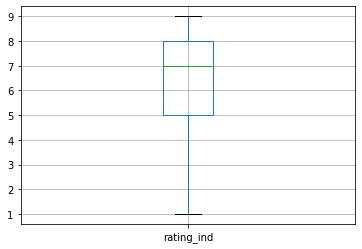

In [33]:
action_boxplot = action_df.boxplot(column=['rating_ind'])
plt.show()

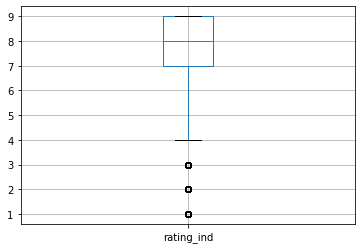

In [34]:
comedy_boxplot = comedy_df.boxplot(column=['rating_ind'])
plt.show()


In [98]:
comedy_outliers=comedy_df[comedy_df['rating_ind']<2]
comedy_outliers

,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3
178,tt7713068,1.0,"Before we saw this movie, my son told me that ...",0,Birds of Prey,6.1,170869.0,Action Adventure Comedy,Action,Adventure,Comedy
179,tt7713068,1.0,Birds of Prey: and the Fantabulous Emancipatio...,0,Birds of Prey,6.1,170869.0,Action Adventure Comedy,Action,Adventure,Comedy
290,tt8080292,1.0,There is a moment in one of Terry Pratchett's ...,0,The Watch,5.1,3164.0,Action Adventure Comedy,Action,Adventure,Comedy
291,tt8080292,1.0,How dare BBC America create this abomination a...,0,The Watch,5.1,3164.0,Action Adventure Comedy,Action,Adventure,Comedy
292,tt8080292,1.0,One of the things I keep hearing about this sh...,0,The Watch,5.1,3164.0,Action Adventure Comedy,Action,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
14802,tt1612774,1.0,This struck me as a film people were pained to...,0,Rubber,5.8,34403.0,Comedy Fantasy Horror,Comedy,Fantasy,Horror
14806,tt1612774,1.0,How does one succinctly describe Rubber to ano...,0,Rubber,5.8,34403.0,Comedy Fantasy Horror,Comedy,Fantasy,Horror
15043,tt3838992,1.0,I have seen reviews here bashing the movie. Yo...,0,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy
15046,tt3838992,1.0,Kevin Smith definitely didn't shoot for the mo...,0,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy


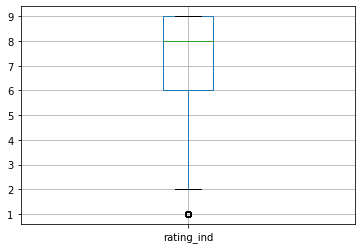

In [35]:
drama_boxplot = drama_df.boxplot(column=['rating_ind'])
plt.show()

In [37]:
drama_df['rating_ind'].value_counts()

9.0    1799
8.0    1638
7.0     897
6.0     414
1.0     367
5.0     318
4.0     263
3.0     248
2.0     231
Name: rating_ind, dtype: int64

In [38]:
drama_outliers=drama_df[drama_df['rating_ind']<2]


drama_horror_out=drama_outliers[drama_outliers['genre'].str.contains('Horror')]
drama_action_out=drama_outliers[drama_outliers['genre'].str.contains('Action')]
drama_comedy_out=drama_outliers[drama_outliers['genre'].str.contains('Comedy')]
print(f'Drama mixed with Action')
print(len(drama_action_out['movie_id']))
print(f'Drama mixed with Horror')
print(len(drama_horror_out['movie_id']))
print(f'Drama mixed with Comedy')
print(len(drama_comedy_out))
drama_outliers

Drama mixed with Action
132
Drama mixed with Horror
57
Drama mixed with Comedy
78


,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3
51,tt11242246,1.0,Cheesy. Just cheesy. This is a total DISGRACE ...,0,The Equalizer,4.4,4356.0,Action Crime Drama,Action,Crime,Drama
69,tt8179402,1.0,"It's a fantastic show, and I genuinely believe...",0,Fate: The Winx Saga,6.9,22440.0,Action Adventure Drama,Action,Adventure,Drama
124,tt5171438,1.0,The usual talentless hacks are back with their...,0,Star Trek: Discovery,7.2,96955.0,Action Adventure Drama,Action,Adventure,Drama
135,tt5171438,1.0,This is absolutely NOT Star Trek. Star Trek ha...,0,Star Trek: Discovery,7.2,96955.0,Action Adventure Drama,Action,Adventure,Drama
209,tt1600194,1.0,When has a sequel approached or surpassed the ...,0,Hawaii Five-0,7.3,67008.0,Action Crime Drama,Action,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...,...
14959,tt1663655,1.0,"Being a huge fan of the French 2008 movie ""Mar...",0,Martyrs,4.0,5417.0,Drama Horror Thriller,Drama,Horror,Thriller
14980,tt0498381,1.0,Like someone already wrote on here Rings 2017 ...,0,Rings,4.5,37928.0,Drama Horror Mystery,Drama,Horror,Mystery
14982,tt0498381,1.0,"Sometimes regardless of view, a film is just a...",0,Rings,4.5,37928.0,Drama Horror Mystery,Drama,Horror,Mystery
14984,tt0498381,1.0,"""Rings"" is a horror movie in which we watch a ...",0,Rings,4.5,37928.0,Drama Horror Mystery,Drama,Horror,Mystery


In [39]:
drama_horror=drama_df[drama_df['genre'].str.contains("Horror")]
drama_horror
drama_horror['rating_ind'].value_counts()

8.0    350
9.0    279
7.0    251
6.0    149
5.0     99
4.0     80
3.0     76
2.0     63
1.0     57
Name: rating_ind, dtype: int64

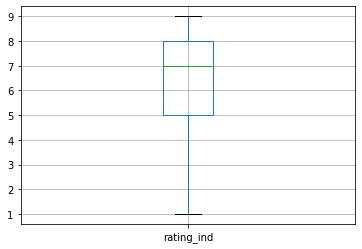

In [40]:
horror_boxplot = horror_df.boxplot(column=['rating_ind'])
plt.show()

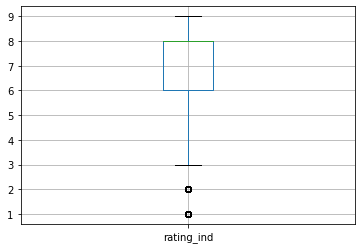

In [41]:
boxplot =movie_df.boxplot(column=['rating_ind'])
plt.show()

In [74]:
movie_df['rating_ind'].median()

8.0

In [ ]:
# look at the ouliers clean them if needed


<AxesSubplot:>

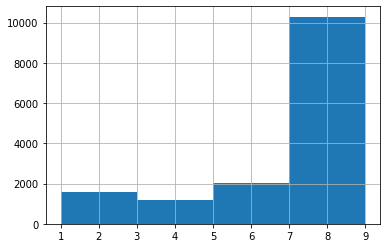

In [42]:
movie_df['rating_ind'].hist(bins=4)

In [43]:

movie_df['rating_ind'].value_counts()

8.0    4013
9.0    3682
7.0    2598
6.0    1240
1.0    1011
5.0     801
3.0     599
4.0     582
2.0     553
Name: rating_ind, dtype: int64

<AxesSubplot:>

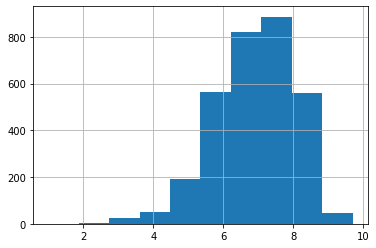

In [44]:
movie_info_clean['rating'].hist(bins=10)

!pip install -U textblob


In [45]:
#example of how texblob works
from textblob import TextBlob

In [46]:
txt=movie_df["rating_text"]
polar=[]
for i in txt:
    blob=TextBlob(i)
    polar.append(blob.sentiment.polarity)
    #print(blob.sentiment.polarity)
    

In [47]:
movie_df=movie_df.assign(polarity=polar)

In [109]:
movie_df

,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3,polarity
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.207545
1,tt6878306,8.0,Having read the book made the movie easier to ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.096111
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.081234
3,tt6878306,9.0,I didn't really love this film. I think it is ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.221005
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.061438
...,...,...,...,...,...,...,...,...,...,...,...,...
15074,tt0086154,8.0,Psycho II does a great job continuing with the...,1,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery,0.193419
15075,tt0086154,8.0,Everyone knows the original 'Psycho' film and ...,1,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery,0.075643
15076,tt9742392,3.0,"This movie just becomes one more recent film ,...",0,Kindred,4.8,561.0,Drama Horror Mystery,Drama,Horror,Mystery,0.015650
15077,tt9742392,2.0,The success of a slow-moving thriller depends ...,0,Kindred,4.8,561.0,Drama Horror Mystery,Drama,Horror,Mystery,0.087187


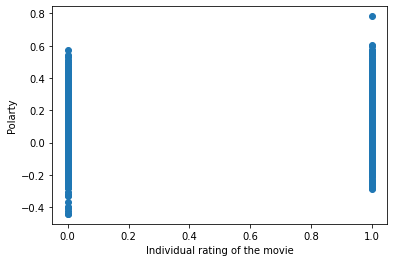

In [49]:
#plt.scatter(review_info['polarity'],review_info['rating_ind'],c=)

plt.scatter(movie_df['pos_neg_ind'],movie_df['polarity'])
#clb = plt.colorbar()
plt.xlabel("Individual rating of the movie")
plt.ylabel("Polarty")
#clb.set_label("")
plt.show()

In [54]:
!pip install wordcloud

In [55]:
!pip install seaborn

In [58]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=c0b206926d787165c72af19db1258ba28f1d1429384d8075a65180631bbb8b61
  Stored in directory: c:\users\arpib\appdata\local\pip\cache\wheels\ac\cb\8a\b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
import pandas as pd 
stopwords = set(STOPWORDS)
import numpy as np
from PIL import Image
from os import path

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
negative_df=movie_df[movie_df['pos_neg_ind']==0]
negative_df

,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3,polarity
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...,0,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.061438
5,tt6475714,4.0,IN A NUTSHELL:\nThis action-adventure movie is...,0,Monster Hunter,5.3,18284.0,Action Adventure Fantasy,Action,Adventure,Fantasy,0.022624
6,tt6475714,6.0,"When you see the movie trailer, you can't wait...",0,Monster Hunter,5.3,18284.0,Action Adventure Fantasy,Action,Adventure,Fantasy,-0.071418
7,tt6475714,7.0,I was expecting this to be a run of the mill a...,0,Monster Hunter,5.3,18284.0,Action Adventure Fantasy,Action,Adventure,Fantasy,0.151667
8,tt6475714,5.0,Monster Hunter is a new fantasy action film di...,0,Monster Hunter,5.3,18284.0,Action Adventure Fantasy,Action,Adventure,Fantasy,-0.072856
...,...,...,...,...,...,...,...,...,...,...,...,...
15070,tt0086154,7.0,A Sequel to Alfred Hitchcock's Cult-Classic 'P...,0,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery,0.294531
15073,tt0086154,7.0,"I don't know why, but when I was shopping for ...",0,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery,0.078053
15076,tt9742392,3.0,"This movie just becomes one more recent film ,...",0,Kindred,4.8,561.0,Drama Horror Mystery,Drama,Horror,Mystery,0.015650
15077,tt9742392,2.0,The success of a slow-moving thriller depends ...,0,Kindred,4.8,561.0,Drama Horror Mystery,Drama,Horror,Mystery,0.087187


In [52]:
positive_df=movie_df[movie_df['pos_neg_ind']==1]
positive_df


,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3,polarity
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.207545
1,tt6878306,8.0,Having read the book made the movie easier to ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.096111
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.081234
3,tt6878306,9.0,I didn't really love this film. I think it is ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama,0.221005
9,tt0765010,9.0,"""Brothers"" is an American remake of an excelle...",1,Brothers,7.1,112451.0,Action Drama Thriller,Action,Drama,Thriller,0.128012
...,...,...,...,...,...,...,...,...,...,...,...,...
15069,tt0256009,8.0,I have to certainly ask myself what the other ...,1,The Devil's Backbone,7.4,61988.0,Drama Horror,Drama,Horror,None,-0.041553
15071,tt0086154,9.0,"Of course, PSYCHO II can't hold a candle to Hi...",1,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery,0.183399
15072,tt0086154,9.0,Back in the 60's the genre wasn't popular or h...,1,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery,0.313840
15074,tt0086154,8.0,Psycho II does a great job continuing with the...,1,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery,0.193419


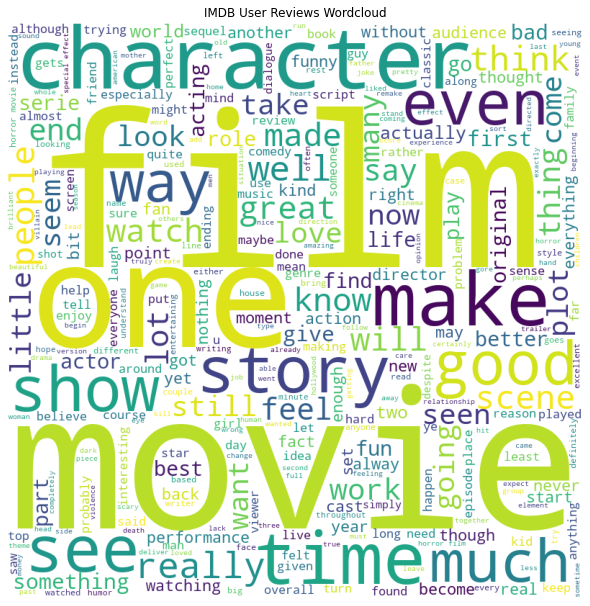

In [60]:
#Wordcloud for combined dataset
comment_words = ''

# iterate through dataframe
for val in movie_df.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Convert each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("IMDB User Reviews Wordcloud")
  
plt.show()

In [61]:

#eliminating common words from collected tokens to observe more granular results between wordclouds
stopwords = list(stopwords)+["show", "movie", "character", "time", "film", "one", "make", "serie", 
                             "see", "story", "characters", "watch", "series", "good", "even", "much", "well",
                            "really", "first", "great", "way","scene","will","people","made"]

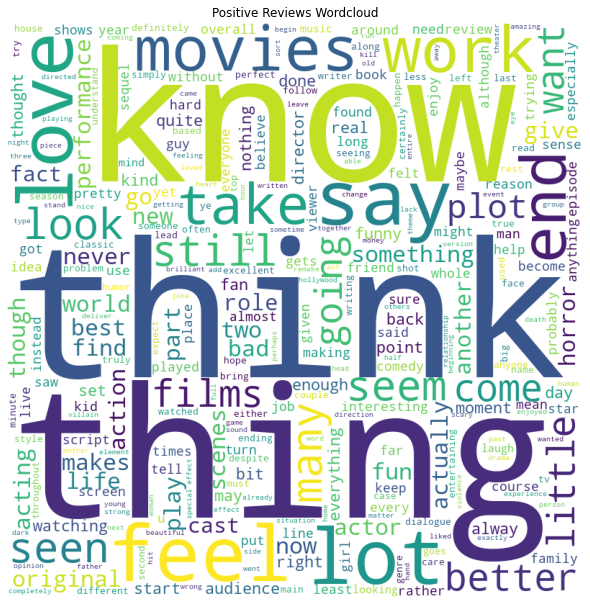

In [62]:
comment_words = ''

# iterate through dataframe
for val in movie_df.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Convert each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Positive Reviews Wordcloud")
  
plt.show()

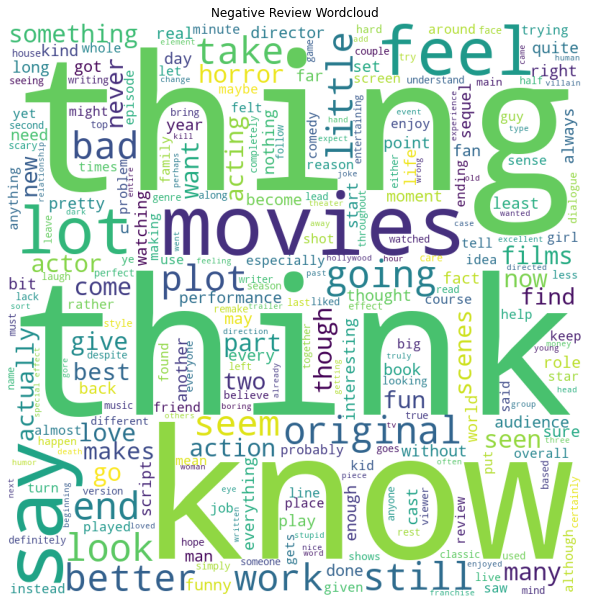

In [64]:
#Wordcloud for negative reviews
#negative reviews across dataset
comment_words = ''
for val in negative_df.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Negative Review Wordcloud")

plt.show()

In [139]:
# machine learning model
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [151]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["show", "movie", "character", "time", "film", "one", "make", "serie", 
                             "see", "story", "characters", "watch", "series", "good", "even", "much", "well",
                            "really", "first", "great", "way","scene","will","people","made","think","thing","know"])

vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words)

#X = vectorizer.fit_transform(["this is an apple.","this is a book."])

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#remove symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words = my_stop_words,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(movie_df['rating_text'])

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, movie_df['rating_text'], test_size=0.2, random_state=1)

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(movie_df['rating_text'])

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, movie_df['pos_neg_ind'], test_size=0.8, random_state=42)

In [170]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.620026525198939


In [171]:
n_positive = movie_df[movie_df['pos_neg_ind'] == 1]
print(len(n_positive))

7695


In [172]:
n_negative = movie_df[movie_df['pos_neg_ind'] == 0]
print(len(n_negative))

7384


In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.70      0.40      0.51      5910
           1       0.59      0.83      0.69      6154

    accuracy                           0.62     12064
   macro avg       0.64      0.62      0.60     12064
weighted avg       0.64      0.62      0.60     12064



In [174]:
from sklearn.linear_model import LinearRegression

plot_model = LinearRegression().fit(X_train, y_train)
predicted_model = plot_model.fit(X_train, y_train)

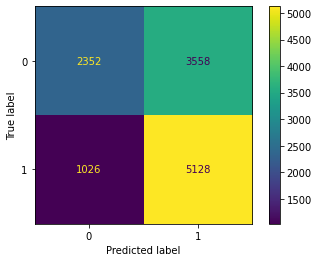

In [175]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)